# CSCI 4622 Machine Learning Final Project

**Authors:**  
+ Kaitlin Coleman _[kaitlin.coleman@colorado.edu]()_
+ Jot Kaur _[jot.kaur@colorado.edu]()_
+ Alex Ho _[alex.ho@colorado.edu]()_
+ Liam Nestelroad _[liam.nestelroad@colorado.edu]()_

In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from time import time

%matplotlib inline


## Summary

The goal of this project is to create a predictive model for Alzheimer’s disease (AD) based on existing data on the disease. Alzheimer’s disease is one of the most common forms of dementia and affects approximately 5.5 Million Americans. Alzheimer’s often begins years before symptoms appear, making early detection through traditional methods very difficult (Alzheimer’s Association). This is where the new age of technology and advancements in computer science can fill gaps where traditional methods lack, using data to make inferences that humans may not be able to. Our group was fascinated with this meaningful and important application of machine learning, and wanted to learn how machine learning can assist in the medical field, specifically with such a detrimental disease such as Alzheimer’s. 

## Data

For this project we will use a neuroimaging data set collected under the OASIS (Open Access Series Imaging Studies) Brains project. The OASIS Brains project was developed to help make neuroimaging datasets freely available to the scientific community in order to enrich knowledge and facilitate future discoveries in clinical neuroscience. The dataset we will be using is called OASIS-3 and it is a longitudinal neuroimaging, clinical, cognitive, and biomarker dataset for normal aging and Alzheimer’s Disease. In this project we will use two different sets of data to apply two different machine learning methods. The first is a longitudinal brain imaging scan study and the second is a cross-sectional brain imaging study.  


The first dataset we will use the __Longitudinal__ study. This study includes data from 374 MRI scans of 186 subjects. The subjects range from ages 60 to 96 and all data was acquired on the same scanner. Each row of the dataset is a different MRI scan and consists of 15 columns of data that describe information about the subject’s demographic information and results from the scan. The first four columns are the subject ID, MRI ID, (both a combination of numbers and characters) and resulting classification of being “demented” or “nondemented” indicating the onset of Alzheimer’s or not, and the number of the participant’s visit. The next five columns describe demographic information about the subject including gender as M or F, their dominant hand as R or L, their age, years of education they have, and their socioeconomic status (SES) as classified into categories from 1 (highest status) to 5 (lowest status) (Hollingshead, 1957). The sixth column is a Mini-Mental State Examination Score (MMSE) which ranges from a score of 0 (worst) to 30 (best) (Folstein, Folstein, & McHugh, 1975). Next, is a Clinical Dementia Rating which consists of a scale 0=no dementia, 0.5=very mild AD, 1 = mild AD, 2 = moderate AD, 3 = severe AD (Morris, 1993).  Next, is a column of Atlas Scaling Factor (ASF) which is a unitless computed volume scaling factor of the brain. This score should be proportional to the next column the Estimated Total Intracranial Volume (eTIV) in cm. cubed (Buckner et al., 2004). Finally, the last column is the Normalized Whole Brain Volume (nWBV) described as a percentage (Fotenos et al., 2005).   


The second dataset we will use is the cross-sectional brain imaging study. This study includes data from 437 subjects that each participated in one MRI scan. The subjects in this study range from ages 18 to 96. The data provided is organized in the same way and contains the same content as described in the previous study.



## Data Cleaning

Most of the data cleaning was going through and imuting missing values with the column mean, normalizing numerical data, stratifying catigorical columns, and removing unnecessary information as can be seen below:

In [2]:
CROSS_SECTIONAL = 'data/oasis_cross-sectional.csv'
LONGITUDINAL = 'data/oasis_longitudinal.csv'

# Load in data from CSV
data_l = pd.read_csv(LONGITUDINAL) 
data_cs = pd.read_csv(CROSS_SECTIONAL)

In [3]:
# Initial data preview
data_l.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data_l.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# Changes the column name so there is consistancy between data frames.
data_cs.rename(columns={'Educ':'EDUC'}, inplace=True)
data_cs.rename(columns={'ID':'Subject ID'}, inplace=True)
data_l.rename(columns={'MR Delay':'Delay'}, inplace=True)

In [6]:
# delete obsolete data columns
del data_l['MRI ID']
del data_l['Group']

In [7]:
# Remove rows which has NaN in the CDR column
# https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/
data_cs.dropna(subset=['CDR'], inplace=True)
data_l.dropna(subset=['CDR'], inplace=True)

In [8]:
# filling missing entries with column means for each data frame.
#https://thispointer.com/pandas-replace-nan-with-mean-or-average-in-dataframe-using-fillna/
sub_k = ['EDUC','SES','MMSE']
for k in sub_k:
    data_l[k].fillna(value=data_l[k].mean(), inplace=True)
    data_cs[k].fillna(value=data_l[k].mean(), inplace=True)

In [9]:
# Encoding catagorical columns as values 
# https://izziswift.com/label-encoding-across-multiple-columns-in-scikit-learn/
encodings = ['M/F', 'Hand', 'Subject ID']
for encode in encodings:
    le = LabelEncoder()
    data_l[encode] = data_l[[encode]].apply(le.fit_transform)
    data_cs[encode] = data_cs[[encode]].apply(le.fit_transform)

In [28]:
# Normalize numerical columns with the minmaxscaler function
# https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
cs_column_names = list(data_cs)
l_column_names = list(data_l)

for col in ['Age', 'Delay', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']:
    data_cs[col] = MinMaxScaler().fit_transform(np.array(data_cs[col]).reshape(-1,1))

for col in ['Age', 'SES', 'MMSE', 'eTIV', "ASF", 'nWBV', 'EDUC', 'Delay']:
    data_l[col] = MinMaxScaler().fit_transform(np.array(data_l[col]).reshape(-1,1))



/home/liamnestelroad/Documents/CUBoulder/2021_Spring/ML/CSCI_4622_MachineLearning/ml_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/liamnestelroad/Documents/CUBoulder/2021_Spring/ML/CSCI_4622_MachineLearning/ml_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [29]:
# Cleaned data preview
data_cs.head()


,Subject ID,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,0,0,0,0.650794,0.25,0.50,0.9375,0.0,0.254315,0.487685,0.623167,NaN
1,1,0,0,0.349206,0.75,0.00,0.9375,0.0,0.027618,0.817734,0.953079,NaN
2,2,0,0,0.634921,0.75,0.50,0.8125,0.5,0.380898,0.315271,0.478006,NaN
8,3,1,0,0.650794,1.00,0.25,1.0000,0.0,0.590334,0.221675,0.281525,NaN
9,4,0,0,0.301587,0.50,0.25,1.0000,0.0,0.227848,0.901478,0.656891,NaN


In [31]:
data_l.head()

,Subject ID,Visit,Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0.000000,1,0,0.710526,0.470588,0.250000,0.884615,0.0,0.981069,0.269430,0.009845
1,0,2,0.173172,1,0,0.736842,0.470588,0.250000,1.000000,0.0,1.000000,0.191710,0.000000
2,1,1,0.000000,1,0,0.394737,0.352941,0.365113,0.730769,0.5,0.636971,0.476684,0.239100
3,1,2,0.212202,1,0,0.421053,0.352941,0.365113,0.923077,0.5,0.703786,0.357513,0.188467
4,1,3,0.718075,1,0,0.526316,0.352941,0.365113,0.692308,0.5,0.659243,0.295337,0.222222


## EDA

We will summarize our dataset with a few key plots and statistics to better understand our data. First, we will determine the average dementia cases for each given feature with 95% confidence intervals. For binary traits such as gender, we will conduct t-tests to find if there is a statistically significant relationship between these features and dementia cases. With features with ranges, we will plot the data with the feature’s range on the x-axis and the number of dementia cases on the y-axis. We will also create scatter-plots with the various features and the dementia level to visually find correlations in that way. To statistically find the significance, we will conduct chi-squared tests and Factorial Anova tests on the levels of dementia and features. This analysis will help us determine which features are significant.We will use Spearman's correlation coefficient between the various features to find correlating features and their relationships. Although these are many plots and statistical analyses, we will show the most interesting and significant in the report. 

### General Information About the Data

In [13]:
data_cs.describe()

,Subject ID,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,0.0
mean,117.000000,0.336170,0.0,0.624519,0.544681,0.372073,0.816489,0.285106,0.387224,0.517891,0.491951,NaN
std,67.982841,0.473406,0.0,0.191926,0.327877,0.268542,0.231054,0.383405,0.184543,0.235989,0.189776,NaN
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,58.500000,0.000000,0.0,0.523810,0.250000,0.250000,0.750000,0.000000,0.258918,0.342365,0.370235,NaN
50%,117.000000,0.000000,0.0,0.634921,0.500000,0.365113,0.937500,0.000000,0.372842,0.507389,0.486804,NaN
75%,175.500000,1.000000,0.0,0.761905,0.750000,0.500000,1.000000,0.500000,0.489068,0.689655,0.617302,NaN
max,234.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,NaN


In [32]:
data_l.describe()

,Subject ID,Visit,Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.0,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,73.343164,1.882038,0.225504,0.428954,0.0,0.447721,0.505756,0.365113,0.897781,0.290885,0.425533,0.443359,0.449312
std,43.625116,0.922843,0.240805,0.495592,0.0,0.201078,0.169196,0.276166,0.141282,0.374557,0.196146,0.192409,0.194222
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,0.000000,0.000000,0.0,0.289474,0.352941,0.250000,0.884615,0.000000,0.279510,0.290155,0.313643
50%,71.000000,2.000000,0.209170,0.000000,0.0,0.447368,0.529412,0.250000,0.961538,0.000000,0.405345,0.440415,0.447257
75%,111.000000,2.000000,0.330807,1.000000,0.0,0.578947,0.588235,0.500000,1.000000,0.500000,0.546771,0.580311,0.586498
max,149.000000,5.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


### Data Distrobution Histograms

DATA_L


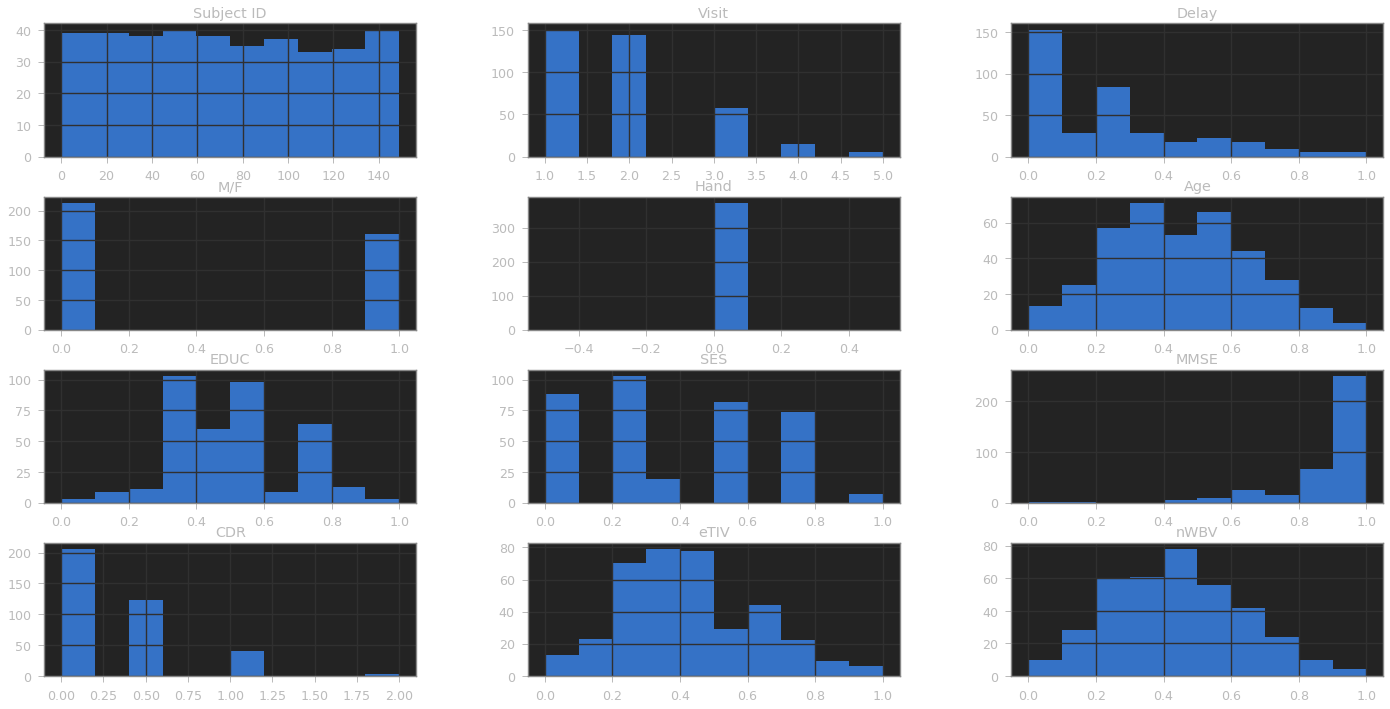

In [41]:
def plot_hist(df):
    fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(24, 12))
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            try:
                df.hist(column = df.columns[i], bins = 10, ax=axis)
            except ValueError as e:
                pass
            i = i+1

    plt.show()
print("DATA_L")
plot_hist(data_l)


DATA_CS


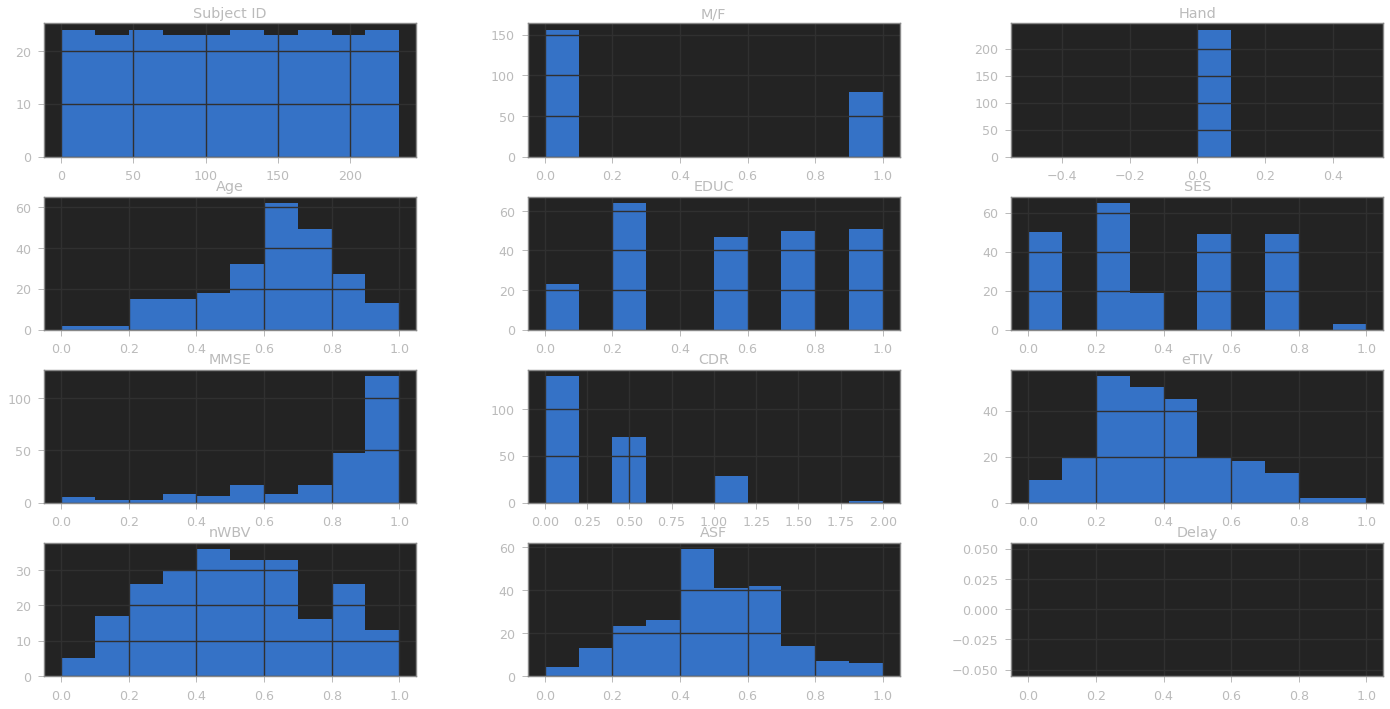

In [42]:
print("DATA_CS")
plot_hist(data_cs)
plt.show()

### Feature Corrolations

In [34]:
features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
# correlation matrix
cm_l = data_l[features].corr()
cm_cs = data_cs[features].corr()

cm_l

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
M/F,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.572549,-0.249618,-0.561647
Age,-0.037726,1.000000,-0.027886,-0.046665,0.055607,0.042348,-0.518359,-0.035067
EDUC,0.089279,-0.027886,1.000000,-0.708680,0.194454,0.257015,-0.012200,-0.241752
SES,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,-0.254271,0.089436,0.246673
MMSE,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.031789,0.341857,0.039494
eTIV,0.572549,0.042348,0.257015,-0.254271,-0.031789,1.000000,-0.210122,-0.988877
nWBV,-0.249618,-0.518359,-0.012200,0.089436,0.341857,-0.210122,1.000000,0.213476
ASF,-0.561647,-0.035067,-0.241752,0.246673,0.039494,-0.988877,0.213476,1.000000


In [35]:
cm_cs

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
M/F,1.000000,-0.024062,0.068010,-0.049511,-0.019639,0.554889,-0.118417,-0.544050
Age,-0.024062,1.000000,-0.207094,0.154165,-0.252123,0.040104,-0.720340,-0.034460
EDUC,0.068010,-0.207094,1.000000,-0.722549,0.297317,0.147271,0.194903,-0.126571
SES,-0.049511,0.154165,-0.722549,1.000000,-0.228845,-0.177188,-0.113612,0.160048
MMSE,-0.019639,-0.252123,0.297317,-0.228845,1.000000,-0.005727,0.469599,0.014133
eTIV,0.554889,0.040104,0.147271,-0.177188,-0.005727,1.000000,-0.218872,-0.989741
nWBV,-0.118417,-0.720340,0.194903,-0.113612,0.469599,-0.218872,1.000000,0.219154
ASF,-0.544050,-0.034460,-0.126571,0.160048,0.014133,-0.989741,0.219154,1.000000


## Models

### Random Forest Classifier

### SVM

### PCA

### Logistic Regression

## Results

## Conclusions